In [1]:
import sys
import os

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.insert(0, project_root)

from models.model_structures import M3

In [2]:
import torch
from torchvision import datasets, transforms
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

learning_rate = 0.001
training_epochs = 20
batch_size = 32

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root=project_root + '/Data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=project_root + '/Data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

print("train dataset:", train_dataset.data.shape)
print("test dataset :", test_dataset.data.shape)

train dataset: torch.Size([60000, 28, 28])
test dataset : torch.Size([10000, 28, 28])


In [3]:
def train(model, train_loader, optimizer):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (image, label) in enumerate(tqdm(train_loader)):
        image = image.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        hypothesis = model(image)
        loss = criterion(hypothesis, label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        _, predicted = hypothesis.max(1)
        total += label.size(0)
        correct += predicted.eq(label).sum().item()

    accuracy = correct / total

    return train_loss / len(train_loader), accuracy

def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(device)
            label = label.to(device)

            output = model(image)
            loss = criterion(output, label)
            test_loss += loss.item()

            _, predicted = output.max(1)
            total += label.size(0)
            correct += predicted.eq(label).sum().item()

    test_accuracy = correct / total
    return test_loss / len(test_loader), test_accuracy

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:22<00:00, 84.37it/s]


Epoch: 1/20.. Training loss: 0.314372.. Test loss: 0.137818.. Test Accuracy: 0.957332


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:21<00:00, 88.68it/s]


Epoch: 2/20.. Training loss: 0.107167.. Test loss: 0.076414.. Test Accuracy: 0.977364


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:20<00:00, 91.57it/s]


Epoch: 3/20.. Training loss: 0.066052.. Test loss: 0.067581.. Test Accuracy: 0.979467


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:20<00:00, 90.04it/s]


Epoch: 4/20.. Training loss: 0.047256.. Test loss: 0.072341.. Test Accuracy: 0.979968


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:23<00:00, 78.85it/s]


Epoch: 5/20.. Training loss: 0.036162.. Test loss: 0.064575.. Test Accuracy: 0.983173


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:24<00:00, 75.19it/s]


Epoch: 6/20.. Training loss: 0.029134.. Test loss: 0.061493.. Test Accuracy: 0.982672


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:24<00:00, 76.54it/s]


Epoch: 7/20.. Training loss: 0.023963.. Test loss: 0.062030.. Test Accuracy: 0.983373


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:20<00:00, 92.21it/s]


Epoch: 8/20.. Training loss: 0.019540.. Test loss: 0.072411.. Test Accuracy: 0.983674


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:21<00:00, 87.00it/s]


Epoch: 9/20.. Training loss: 0.018273.. Test loss: 0.057768.. Test Accuracy: 0.984575


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:24<00:00, 76.01it/s]


Epoch:10/20.. Training loss: 0.015155.. Test loss: 0.061909.. Test Accuracy: 0.985577


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:21<00:00, 88.06it/s]


Epoch:11/20.. Training loss: 0.012335.. Test loss: 0.068849.. Test Accuracy: 0.984976


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:22<00:00, 84.27it/s]


Epoch:12/20.. Training loss: 0.012217.. Test loss: 0.078667.. Test Accuracy: 0.982372


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:20<00:00, 92.73it/s]


Epoch:13/20.. Training loss: 0.009746.. Test loss: 0.076087.. Test Accuracy: 0.984175


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:21<00:00, 88.98it/s]


Epoch:14/20.. Training loss: 0.010343.. Test loss: 0.086877.. Test Accuracy: 0.982873


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:20<00:00, 90.54it/s]


Epoch:15/20.. Training loss: 0.008241.. Test loss: 0.082942.. Test Accuracy: 0.985377


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:20<00:00, 91.54it/s]


Epoch:16/20.. Training loss: 0.008417.. Test loss: 0.083775.. Test Accuracy: 0.983774


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:19<00:00, 93.83it/s]


Epoch:17/20.. Training loss: 0.007491.. Test loss: 0.089210.. Test Accuracy: 0.983874


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:24<00:00, 77.94it/s]


Epoch:18/20.. Training loss: 0.005683.. Test loss: 0.079320.. Test Accuracy: 0.985677


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:22<00:00, 82.57it/s]


Epoch:19/20.. Training loss: 0.006065.. Test loss: 0.095392.. Test Accuracy: 0.983173


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:23<00:00, 78.44it/s]


Epoch:20/20.. Training loss: 0.005990.. Test loss: 0.087959.. Test Accuracy: 0.984876


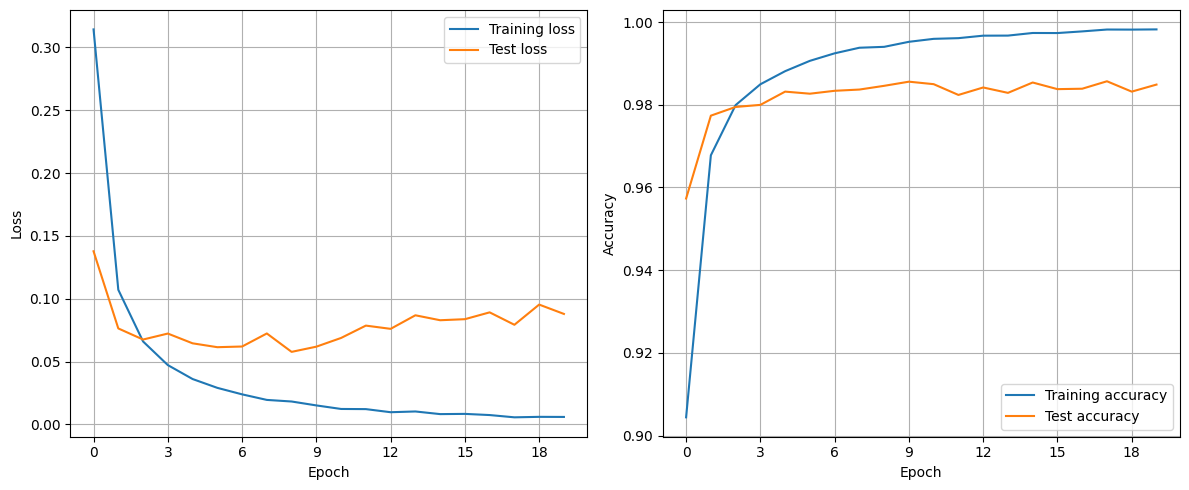

In [4]:
# Model creation
model = M3().to(device)
# Setting up loss function and optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# loss and accuracy value list
loss_keeper = {'train':[], 'test':[]}
accuracy_keeper = {'train': [], 'test': []}

for epoch in range(training_epochs):
    '''
    Training phase
    '''
    train_loss, train_accuracy = train(model, train_loader, optimizer)
    loss_keeper['train'].append(train_loss)
    accuracy_keeper['train'].append(train_accuracy)
    
    '''
    Test phase
    '''
    test_loss, test_accuracy = evaluate(model, test_loader)
    loss_keeper['test'].append(test_loss)
    accuracy_keeper['test'].append(test_accuracy)

    print("Epoch:%2d/%2d.. Training loss: %f.. Test loss: %f.. Test Accuracy: %f" 
          %(epoch + 1, training_epochs, train_loss, test_loss, test_accuracy))
    
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_keeper['train'], label="Training loss")
plt.plot(loss_keeper['test'], label="Test loss")
plt.legend()
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(np.arange(0, training_epochs, step=3))

plt.subplot(1, 2, 2)
plt.plot(accuracy_keeper['train'], label="Training accuracy")
plt.plot(accuracy_keeper['test'], label="Test accuracy")
plt.legend()
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, training_epochs, step=3))

plt.tight_layout()
plt.show()

torch.save(model, project_root + '/models/M3_model.pth')

In [5]:
print(model)

M3(
  (Conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (ApproxReLU1): ApproxReLU()
  (AvgPool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (Flatten): Flatten()
  (FC1): Linear(in_features=1014, out_features=120, bias=True)
  (ApproxReLU2): ApproxReLU()
  (FC2): Linear(in_features=120, out_features=10, bias=True)
)
